# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr
dave,What’s in a Name? is a 40-minute talk Chappell...,Dave Chappelle
eric,Opening Sketch [dramatic music playing] [stree...,Eric Andre
george,"Recorded on November 5, 2005, Beacon Theater, ...",George Carlin
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
 
data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.068595,0.483829
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
dave,What’s in a Name? is a 40-minute talk Chappell...,Dave Chappelle,0.148691,0.517285
eric,Opening Sketch [dramatic music playing] [stree...,Eric Andre,0.025296,0.502300
george,"Recorded on November 5, 2005, Beacon Theater, ...",George Carlin,0.049658,0.509015
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.043865,0.524091
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian,0.133179,0.574780


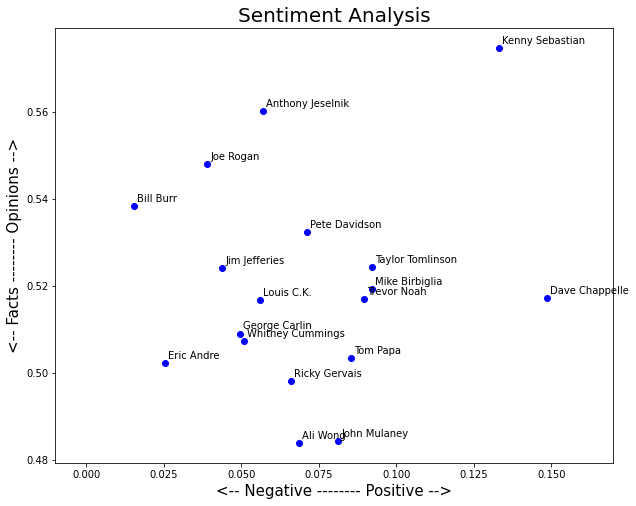

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .17) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
ali,"Ladies and gentlemen, please welcome to the st...",Ali Wong,0.068595,0.483829
anthony,"Thank you. Thank you. Thank you, San Francisco...",Anthony Jeselnik,0.056806,0.560134
bill,"[cheers and applause] All right, thank you! Th...",Bill Burr,0.015214,0.538279
dave,What’s in a Name? is a 40-minute talk Chappell...,Dave Chappelle,0.148691,0.517285
eric,Opening Sketch [dramatic music playing] [stree...,Eric Andre,0.025296,0.502300
george,"Recorded on November 5, 2005, Beacon Theater, ...",George Carlin,0.049658,0.509015
jim,[Car horn honks] [Audience cheering] [Announce...,Jim Jefferies,0.043865,0.524091
joe,[rock music playing] [audience cheering] [anno...,Joe Rogan,0.039042,0.547935
john,"Armed with boyish charm and a sharp wit, the f...",John Mulaney,0.081169,0.484393
kenny,Make some noise for Kenny Sebastian. Oh my God...,Kenny Sebastian,0.133179,0.574780


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [7]:
# The list has 18 elements, one for each transcript
len(list_pieces)

18

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10982341269841271,
  0.07011794532627867,
  0.0676048790179225,
  0.1006832611832612,
  -0.042106537530266344,
  0.14623107111520778,
  0.043776142688480346,
  0.11059920634920634,
  0.022588088396278055,
  0.06731601731601732],
 [0.14379144175440475,
  -0.08791172595520422,
  -0.018946837994457046,
  0.02300964187327824,
  0.13712667803576895,
  0.14103930461073316,
  0.07188888888888889,
  0.01005234718000675,
  0.047098364598364605,
  0.07474947891614557],
 [-0.032260689190037016,
  0.003301963736746346,
  0.041578921657046665,
  0.014611938286180702,
  -0.05097013552895906,
  0.10209224165856819,
  0.02132235469945553,
  -0.031014714145245106,
  -0.027377965523126827,
  0.10599917640011987],
 [0.03392432730668025,
  0.17344769620811287,
  0.11400184383517718,
  0.13508184523809524,
  0.19431188966072685,
  0.11331243987493989,
  0.2531052354855547,
  0.13981092436974787,
  0.1388061968895302,
  0.18272607022607018],
 [-0.031413035339922145,
  0.14800816544566547,
  -0.001902773

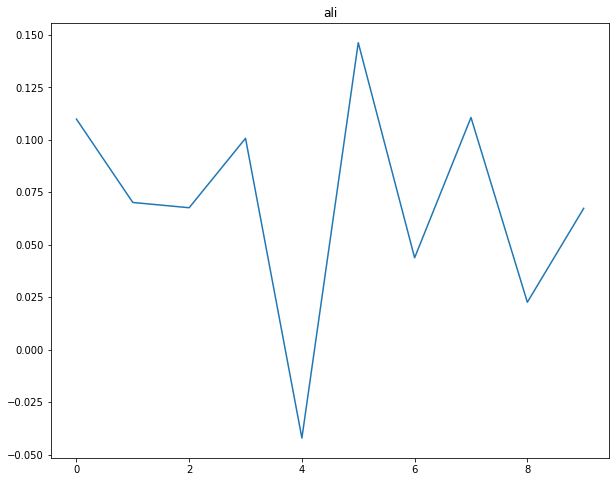

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

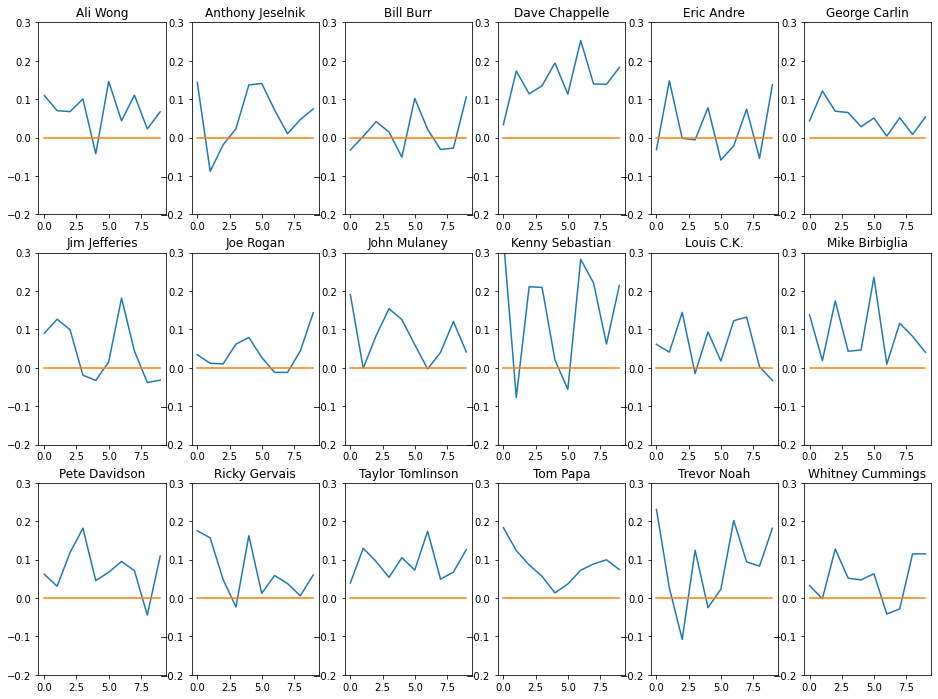

In [12]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [26]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,10)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just go t

In [27]:
len(list_pieces)

18

In [28]:
len(list_pieces[0])

10

In [29]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.5754761904761904,
  0.4336254409171076,
  0.38409221615743366,
  0.47808946608946623,
  0.459513048157116,
  0.5054812654388926,
  0.48244434137291275,
  0.5598968253968255,
  0.5108292282430215,
  0.486976911976912],
 [0.5659611992945325,
  0.6008451492147143,
  0.6256739732930209,
  0.5870018365472911,
  0.47880291005291004,
  0.543896447467876,
  0.49434920634920637,
  0.6823864079183227,
  0.5061237373737373,
  0.5056449414782748],
 [0.6518275534851619,
  0.4324325553673379,
  0.5420943061568059,
  0.5793588846619147,
  0.54196216365334,
  0.5368270165208942,
  0.5307856475923702,
  0.5392505969939597,
  0.49075524833589357,
  0.5596061695118297],
 [0.5639152024446142,
  0.5986541005291006,
  0.43484976751643417,
  0.5173177083333333,
  0.4003996003996004,
  0.6086144179894178,
  0.49137115839243495,
  0.5260154061624651,
  0.4709304152637486,
  0.5719576719576719],
 [0.45507766342671996,
  0.472629426129426,
  0.5082898582898583,
  0.4693452380952381,
  0.4930383022774328,
  0

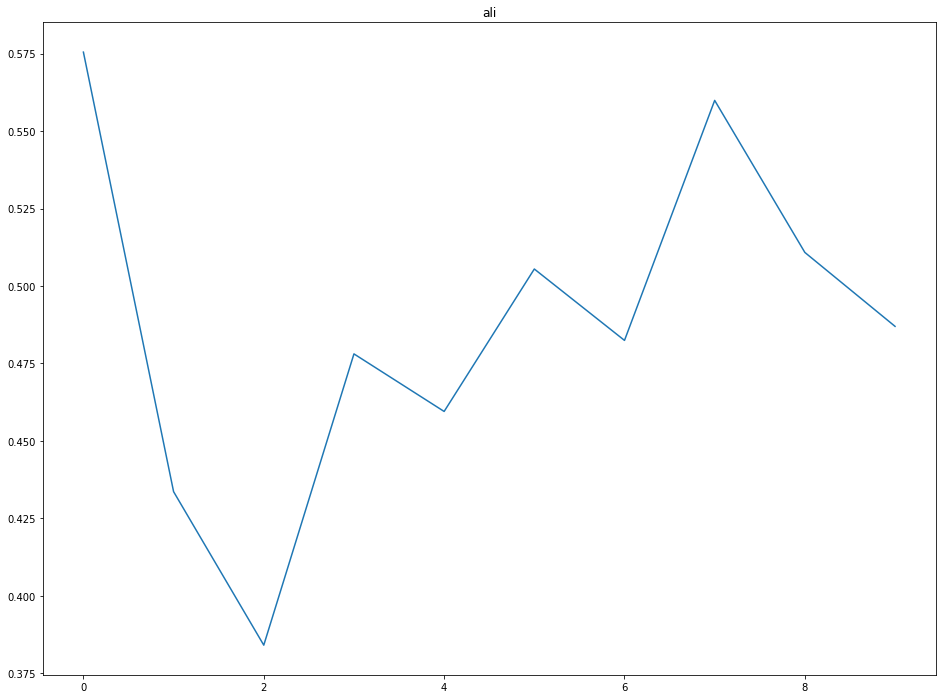

In [30]:
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

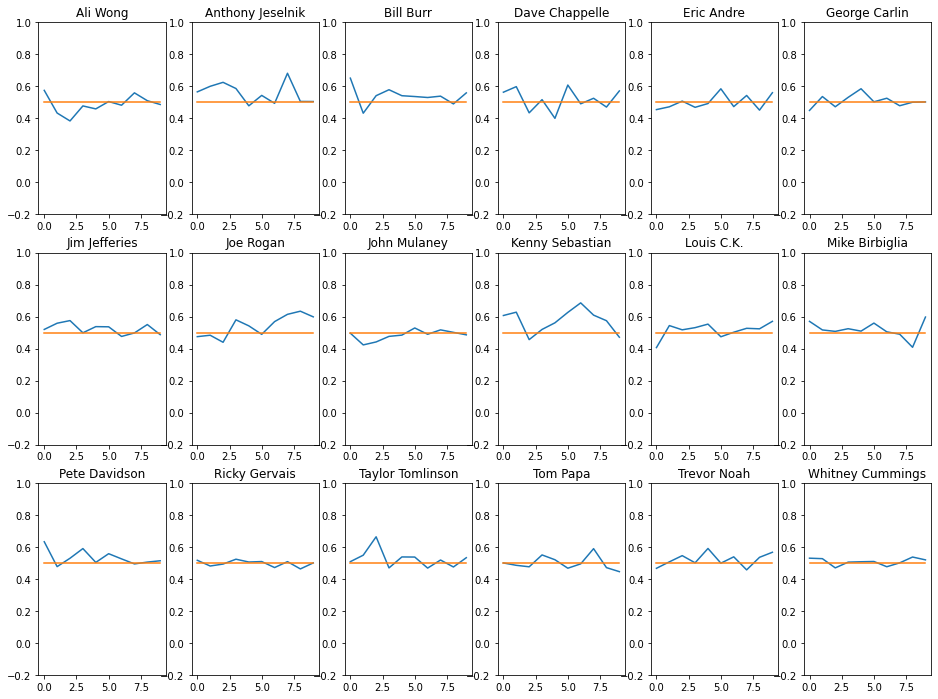

In [32]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.full(10,0.5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=1)
    
plt.show()

Here are a few possible categories that we can use for such a classification:

Positive: Comedians who tend to have a generally positive, upbeat tone in their comedy routines, with little to no negativity or sarcasm. This might include comedians who focus on "clean" or family-friendly humor, or who specialize in feel-good comedy.

Neutral: Comedians who have a relatively neutral tone in their comedy routines, with a mix of positive and negative elements. This might include comedians who use a lot of observational humor, or who tell stories that have both funny and serious elements.

Negative: Comedians who tend to have a more negative or cynical tone in their comedy routines, with a lot of sarcasm or biting humor. This might include comedians who specialize in political or social commentary, or who use a lot of profanity or edgy material.

Subjective: Comedians who have a very personal or subjective style of comedy, with a lot of personal anecdotes or opinions. This might include comedians who use a lot of self-deprecating humor, or who share personal stories about their own lives.
  
As now we have decided the categories for classification, we should consider the threshold value of polarity and subjectivity for such type of classification:
As polairy varies between -1 and 1, therefore we will keep 0 as neutral tone and -1 for highly negative and +1 for highly positive.
As subjectivty varies bewteen 0 and 1, therefor we will keep 0.5  for normal behaviour which consist of both opinios and facts as well and 0 for highly fact things and 1 for highly subjective things.


1. Ali Wong- Mostly Positive, Factual and Negative very few of the times
2. Anthony Jeselnik - Very Negative Beginning and highly Subjective
3. Bill Burr- Neutral as the positivity has same amount as that of nagativity
4. Dave Chapelle - Highly Positive and a little Subjective comparatively
5. Eric Andre- Neutral
6. George Carlin - Positive and little Subjective
7. Jim Jefferies- Negative a few of the times and Subjective
8. Joe Rogan- Mostly Positive and later Subjective
9. John Mulaney - Positive and little Objective
10. Kenny Sebestian- Somewhat Negative and highly Subjective
11. Louis C.K- Mostly Positive and little Subjective
12. Mike Bribgilia-Positive and then Objective later
13. Pete Davidson- A little Negative and Subjective
14. Ricky Gervais- Positive and Neutral mostly 
15. Taylor Tomlinson- Positive and Subjective initially
16. Tom Papa- Highly Positive and Subjective
17. Trevor Noah- Most Negative and Subjective comapritively
18. Whitney Cummings - A little Negative and Neutral mostly

In [13]:
list_pieces = []
for t in data.transcript:
    split = split_text(t,40)
    list_pieces.append(split)
    
list_pieces

[['Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. But thank you, everybody, so much for coming. Um… It’s a very exciting day for me. It’s been a very exciting year for me. I turned 33 this year. Yes! Thank you, five people. I appreciate that. Uh, I can tell that I’m getting older, because, now, when I see an 18-year-old girl, my automatic thought… is “Fuck you.” “Fuck you. I don’t even know you, but fuck you!” ‘Cause I’m straight up jealous. I’m jealous, first and foremost, of their metabolism. Because 18-year-old girls, they could just eat like shit, and then they take a shit and have a six-pack, right? They got that-that beautiful inner thigh clearance where they put their feet together and there’s that huge gap here with the light of potential just radiating through.\nAnd then, when they go to sleep, they just ',
 

In [14]:
# The list has 18 elements, one for each transcript
len(list_pieces)

18

In [15]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

40

In [16]:
polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.17761337868480725,
  0.20059523809523813,
  0.02661064425770304,
  2.2204460492503132e-17,
  0.08859649122807017,
  0.10832417582417582,
  -0.09062500000000001,
  0.1712847222222222,
  0.04093567251461989,
  0.13392857142857142,
  0.06008403361344539,
  0.052133173843700156,
  0.18385714285714286,
  0.010211640211640198,
  0.10096153846153846,
  0.13137254901960785,
  0.103125,
  -0.05156249999999998,
  -0.059663865546218484,
  -0.08647058823529412,
  0.13674873737373738,
  0.02167240311771562,
  0.283201433982684,
  0.15803571428571428,
  0.032048611111111104,
  0.09090909090909091,
  0.07435860707919532,
  0.013499999999999998,
  0.09682539682539683,
  0.16149267399267397,
  0.18749999999999997,
  0.015384615384615398,
  0.09847374847374847,
  -0.05511029411764704,
  0.017777777777777788,
  0.04540816326530612,
  -0.015104166666666648,
  0.08066378066378066,
  0.14305555555555555,
  0.10904761904761906],
 [0.30305177626606195,
  0.2288995215311005,
  0.04312499999999999,
  0.0034

In [17]:
subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for s in lp:
        subjectivity_piece.append(TextBlob(s).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)
    
subjectivity_transcript

[[0.6461451247165533,
  0.6130952380952381,
  0.5065126050420168,
  0.4991666666666667,
  0.4666666666666667,
  0.316529304029304,
  0.3319444444444445,
  0.5948908730158731,
  0.30730994152046787,
  0.29583333333333334,
  0.4130252100840336,
  0.5000199362041466,
  0.3849285714285714,
  0.4297089947089947,
  0.5615384615384615,
  0.5117647058823529,
  0.5611111111111111,
  0.45781249999999996,
  0.49866946778711485,
  0.37176470588235294,
  0.47092171717171716,
  0.6490384615384616,
  0.505026455026455,
  0.4219387755102041,
  0.5458333333333333,
  0.5878787878787879,
  0.41239495798319337,
  0.4228333333333334,
  0.4087301587301587,
  0.6260989010989011,
  0.5283333333333333,
  0.6807692307692309,
  0.477960927960928,
  0.539607843137255,
  0.461965811965812,
  0.5668367346938775,
  0.4885416666666667,
  0.5218253968253969,
  0.4425925925925926,
  0.5588095238095239],
 [0.6076341647770219,
  0.4868421052631579,
  0.5694444444444444,
  0.5925547996976569,
  0.6506696428571429,
  0.769

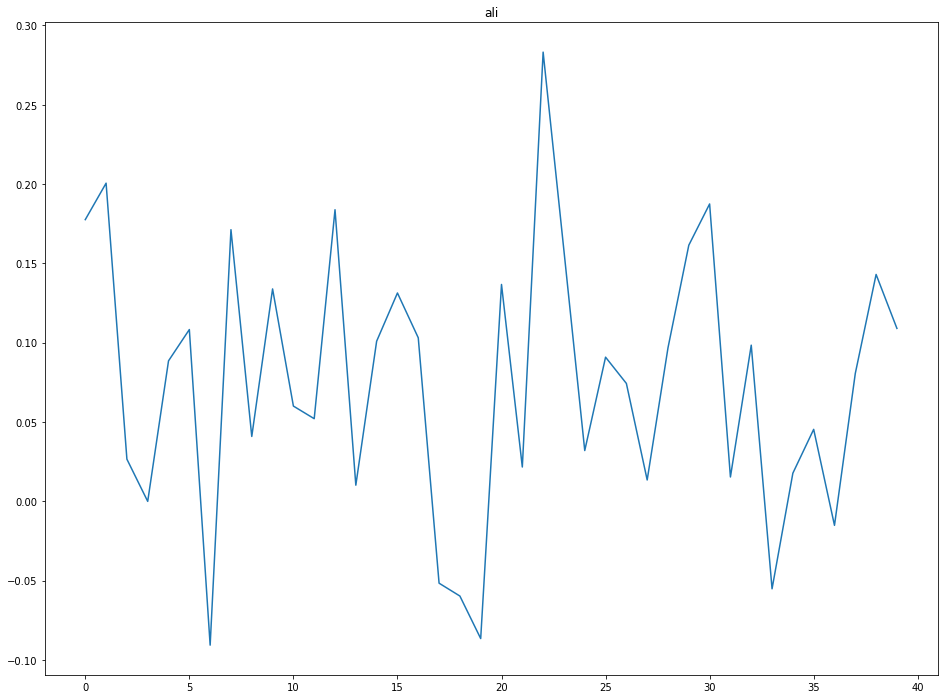

In [18]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

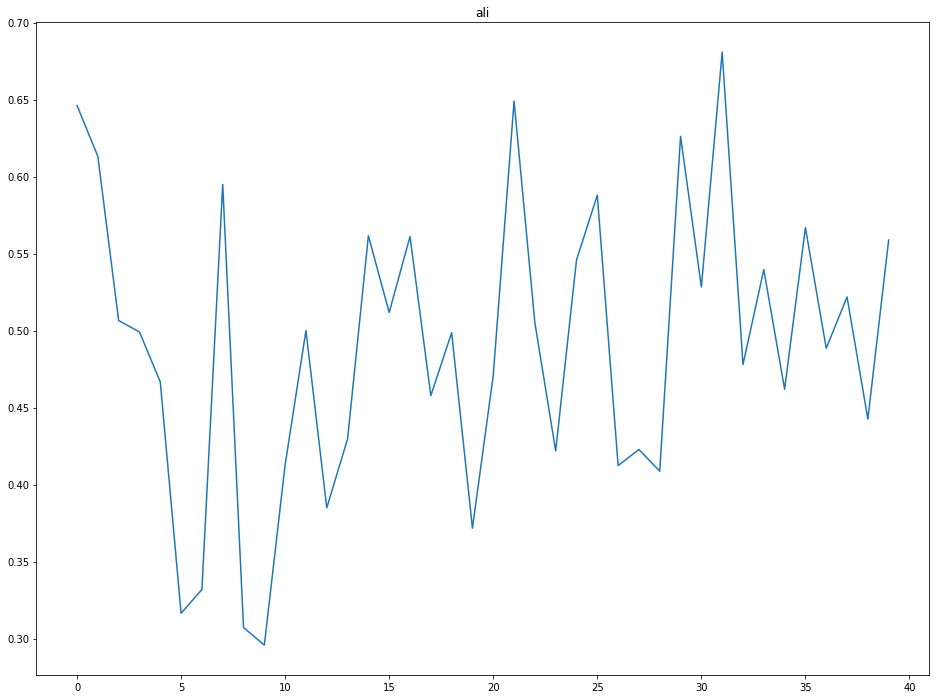

In [19]:
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[0])
plt.show()

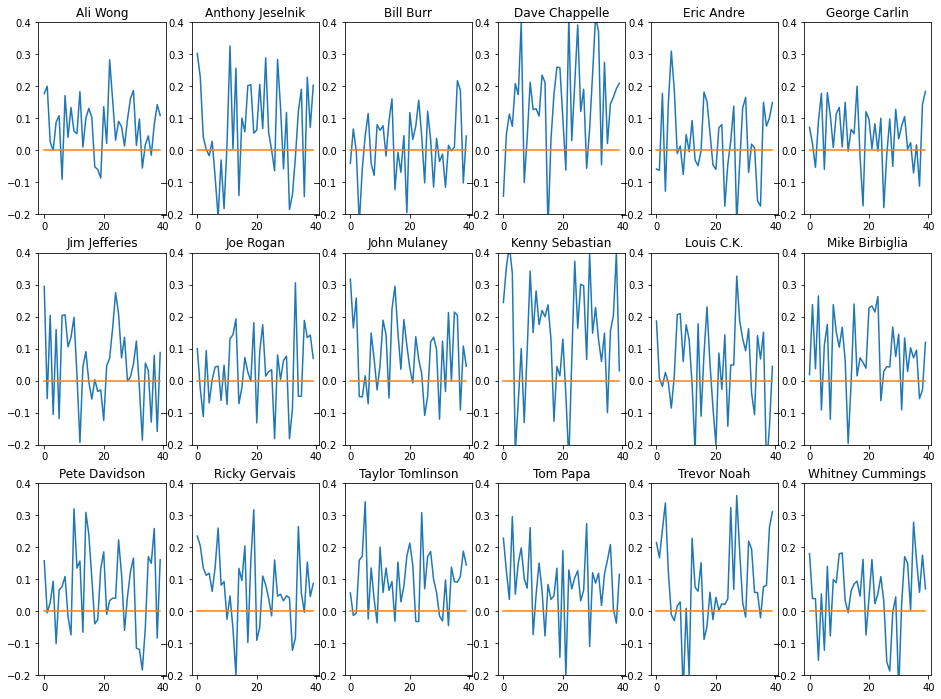

In [25]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,40), np.zeros(40))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.4)
    
plt.show()

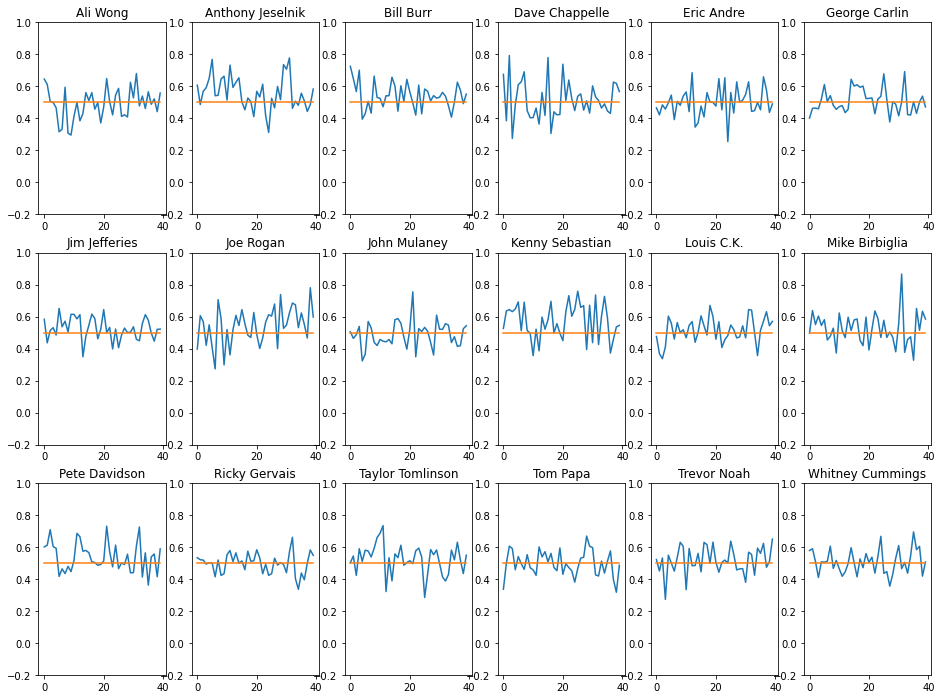

In [23]:
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(3, 6, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,40), np.full(40,0.5))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=1)
    
plt.show()